# LOAN APPROVAL PREDICTION

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from xgboost import XGBClassifier
import joblib

In [4]:
df = pd.read_csv(r"C:\Users\chira\OneDrive\Desktop\SEM 6\AOML\AOML_Project_LOAN APPROVAL ANALYZER\Dataset\LOAN approval Prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Feature Engineering

### Handling Missing Values

In [7]:
df["LoanAmount"].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [8]:
df['LoanAmount'].fillna(np.nanmedian(df['LoanAmount']), inplace=True)

In [11]:
# Fill missing categorical values with mode
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)

### Label Encoding


In [9]:
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])



### ONE HOT ENCODING

In [ ]:
# One-hot encoding for Property_Area
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

### Creating New Features

In [12]:
# Debt-to-Income Ratio
df["Debt_Income_Ratio"] = df["LoanAmount"] / (df["ApplicantIncome"] + df["CoapplicantIncome"] + 1)

# Total Income Feature
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

# Loan to Income Ratio
df["Loan_Income_Ratio"] = df["LoanAmount"] / df["Total_Income"]

### Scaling Numerical Features

In [13]:
from sklearn.preprocessing import StandardScaler

num_cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Total_Income"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# TRAIN-TEST SPLIT


In [10]:
df.drop(['Loan_ID'], axis=1, inplace=True)

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

print('Size of X_train :', X_train.shape)
print('Size of y_train :', y_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_test :', y_test.shape)


Size of X_train : (491, 11)
Size of y_train : (491,)
Size of X_test : (123, 11)
Size of y_test : (123,)


## MODEL TRAINING

### XGBoost Classifier


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from xgboost import XGBClassifier
import joblib

In [20]:
df = pd.read_csv("loan.csv")
df['LoanAmount'].fillna(np.nanmedian(df['LoanAmount']), inplace=True)

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\2164644233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(np.nanmedian(df['LoanAmount']), inplace=True)


In [21]:
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])

# One-hot encoding for Property_Area
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

In [22]:
df.drop(['Loan_ID'], axis=1, inplace=True)

X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

print('Size of X_train :', X_train.shape)
print('Size of y_train :', y_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_test :', y_test.shape)


Size of X_train : (2000, 13)
Size of y_train : (2000,)
Size of X_test : (500, 13)
Size of y_test : (500,)


In [23]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [21:56:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.3, 0.5],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 300, 500],
                         'reg_lambda': [1, 1.5, 2],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=2)

In [24]:
tuned_xgb_model = grid_search.best_estimator_
tuned_xgb_preds = tuned_xgb_model.predict(X_test)
tuned_xgb_f1 = f1_score(y_test, tuned_xgb_preds)
tuned_xgb_acc = accuracy_score(y_test, tuned_xgb_preds)

In [25]:
# Save the best-tuned model
joblib.dump(tuned_xgb_model, "best_xgb_loan_model.h5")

# Print model performance
print(f"Best XGBoost - F1 Score: {tuned_xgb_f1}, Accuracy: {tuned_xgb_acc}")
print(f"Best Parameters: {grid_search.best_params_}")


Best XGBoost - F1 Score: 1.0, Accuracy: 1.0
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'reg_lambda': 2, 'subsample': 1.0}


## Catboost


In [26]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from catboost import CatBoostClassifier
import joblib



In [27]:
df = pd.read_csv(r"loan.csv")
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\3285942381.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [28]:
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])

In [29]:
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

In [30]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [31]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

print('Size of X_train :', X_train.shape)
print('Size of y_train :', y_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_test :', y_test.shape)

Size of X_train : (2000, 13)
Size of y_train : (2000,)
Size of X_test : (500, 13)
Size of y_test : (500,)


In [32]:
param_grid = {
    'iterations': [100, 300, 500],
    'depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 50, 100]
}

In [59]:
catboost = CatBoostClassifier(verbose=0)
grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000023AE7D70460>,
             n_jobs=-1,
             param_grid={'border_count': [32, 50, 100], 'depth': [3, 5, 7, 10],
                         'iterations': [100, 300, 500],
                         'l2_leaf_reg': [1, 3, 5, 7],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2]},
             scoring='f1', verbose=2)

In [60]:
tuned_catboost_model = grid_search.best_estimator_
tuned_catboost_preds = tuned_catboost_model.predict(X_test)
tuned_catboost_f1 = f1_score(y_test, tuned_catboost_preds)
tuned_catboost_acc = accuracy_score(y_test, tuned_catboost_preds)
tuned_catboost_precision = precision_score(y_test, tuned_catboost_preds)
tuned_catboost_recall = recall_score(y_test, tuned_catboost_preds)

In [61]:
# Save the best-tuned model using pickle
filename = 'CatBoost_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(tuned_catboost_model, file)

# Print model performance
print(f"Best CatBoost - F1 Score: {tuned_catboost_f1}, Accuracy: {tuned_catboost_acc}, Precision: {tuned_catboost_precision}, Recall: {tuned_catboost_recall}")
print(f"Best Parameters: {grid_search.best_params_}")

Best CatBoost - F1 Score: 0.998766954377312, Accuracy: 0.998, Precision: 0.9975369458128078, Recall: 1.0
Best Parameters: {'border_count': 100, 'depth': 3, 'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.01}


## KNN Model

In [34]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv(r"loan.csv")

df.fillna(df.median(numeric_only=True), inplace=True)

In [36]:
# Encoding categorical variables
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

df['Loan_Status'] = df['Loan_Status'].astype('category').cat.codes

# One-hot encoding for Property_Area
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

In [37]:
df.drop(['Loan_ID'], axis=1, inplace=True)

selected_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Education', 'Self_Employed', 'Dependents', 'Semiurban', 'Urban', 'Rural']
X = df[selected_features]
y = df['Loan_Status']


In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

# Print dataset sizes
print('Size of X_train :', X_train.shape)
print('Size of y_train :', y_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_test :', y_test.shape)

Size of X_train : (2000, 13)
Size of y_train : (2000,)
Size of X_test : (500, 13)
Size of y_test : (500,)


In [39]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_classifier = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)

# Best KNN model
tuned_knn_model = grid_search_knn.best_estimator_
tuned_knn_preds = tuned_knn_model.predict(X_test)
tuned_knn_f1 = f1_score(y_test, tuned_knn_preds)
tuned_knn_acc = accuracy_score(y_test, tuned_knn_preds)
tuned_knn_precision = precision_score(y_test, tuned_knn_preds)
tuned_knn_recall = recall_score(y_test, tuned_knn_preds)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [40]:

print(f'Optimized KNN Classifier - F1 Score: {tuned_knn_f1}, Accuracy: {tuned_knn_acc}, Precision: {tuned_knn_precision}, Recall: {tuned_knn_recall}')
print(f'Best Parameters: {grid_search_knn.best_params_}')

# Saving Optimized KNN Model Using Pickle
filename_knn = 'KNN_Classifier_Optimized2.model'
with open(filename_knn, 'wb') as file:
    pickle.dump(tuned_knn_model, file)


Optimized KNN Classifier - F1 Score: 0.9794437726723095, Accuracy: 0.966, Precision: 0.9619952494061758, Recall: 0.9975369458128078
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


## RANDOM FOREST MODEL

In [41]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler


In [42]:

# Load the dataset
df = pd.read_csv(r"loan.csv")

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encoding categorical variables
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

df['Loan_Status'] = df['Loan_Status'].astype('category').cat.codes

In [43]:
# One-hot encoding for Property_Area
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

# Drop Loan_ID column
df.drop(['Loan_ID'], axis=1, inplace=True)

# Selecting 13 features for consistency
selected_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Education', 'Self_Employed', 'Dependents', 'Semiurban', 'Urban', 'Rural']
X = df[selected_features]
y = df['Loan_Status']

In [44]:
# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

# Print dataset sizes
print('Size of X_train :', X_train.shape)
print('Size of y_train :', y_train.shape)
print('Size of X_test :', X_test.shape)
print('Size of y_test :', y_test.shape)


Size of X_train : (2000, 13)
Size of y_train : (2000,)
Size of X_test : (500, 13)
Size of y_test : (500,)


In [45]:
# Train Random Forest Model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=300)
rf_classifier.fit(X_train, y_train)

# Predictions
rf_preds = rf_classifier.predict(X_test)
rf_f1 = f1_score(y_test, rf_preds)
rf_acc = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)

In [46]:
print(f'Random Forest Classifier - F1 Score: {rf_f1}, Accuracy: {rf_acc}, Precision: {rf_precision}, Recall: {rf_recall}')

# Saving Random Forest Model Using Pickle
filename_rf = 'RandomForest_Classifier.model'
with open(filename_rf, 'wb') as file:
    pickle.dump(rf_classifier, file)

Random Forest Classifier - F1 Score: 1.0, Accuracy: 1.0, Precision: 1.0, Recall: 1.0


## DECISION TREE MODEL

In [47]:
depths_f1_score = []
depths_test_f1_score = []
depths_test_acc_score = []

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
d_val = []
for d in range(1,30):
    dt_classifier = DecisionTreeClassifier(random_state=300, max_depth=d)
    dt_classifier.fit(X_train, y_train)
    dt_f1_score = np.mean(cross_val_score(dt_classifier, X_train, y_train, scoring='f1', cv=5))
    depths_f1_score.append(dt_f1_score)
    d_val.append(d)
    
    predictions = dt_classifier.predict(X_test)
    # Caculating F1 Score
    dt_test_f1_score = f1_score(y_test, predictions)
    dt_test_acc_score = accuracy_score(y_test, predictions)
    
    depths_test_f1_score.append(dt_test_f1_score)
    depths_test_acc_score.append(dt_test_acc_score)

In [50]:
dt_classifier = DecisionTreeClassifier(random_state=300, max_depth=4)
dt_classifier.fit(X_train, y_train)
dt_f1_score = np.mean(cross_val_score(dt_classifier, X_train, y_train, scoring='f1', cv=5))

predictions = dt_classifier.predict(X_test)
# Caculating F1 Score
dt_test_f1_score = f1_score(y_test, predictions)
dt_test_acc_score = accuracy_score(y_test, predictions)

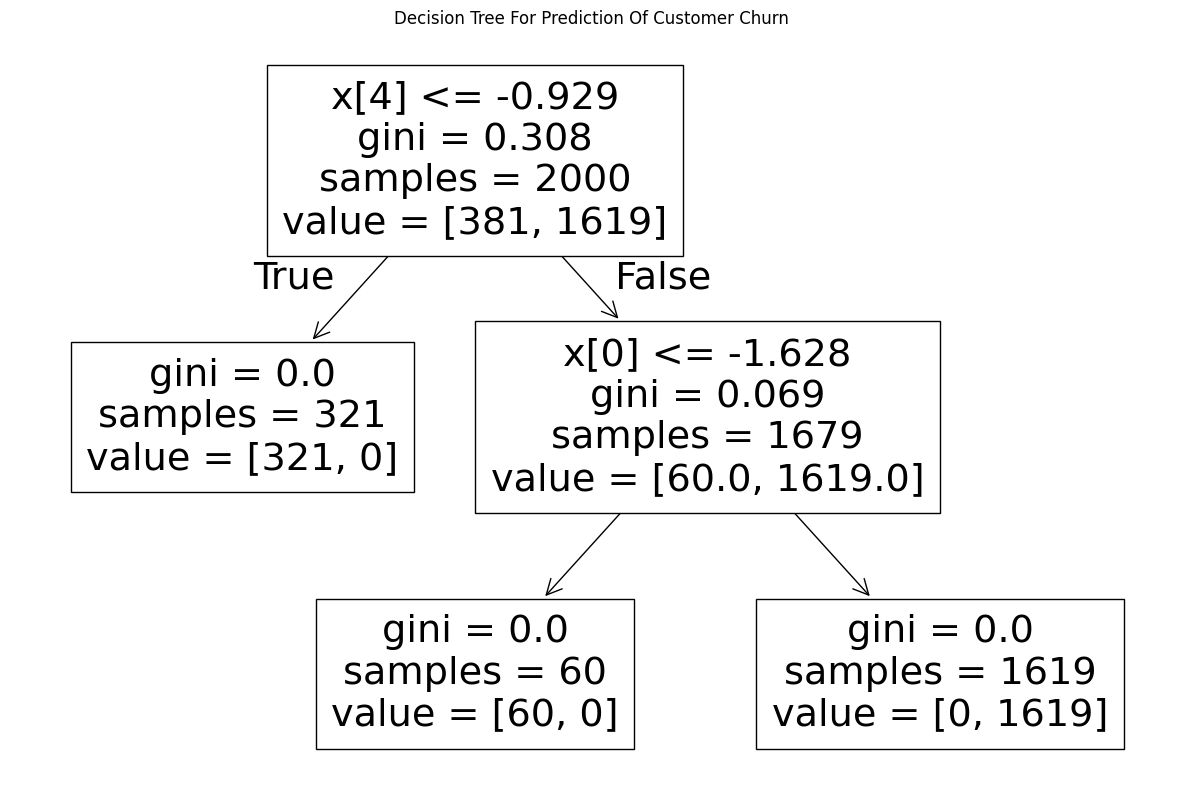

In [51]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt_classifier)
plt.title('Decision Tree For Prediction Of Customer Churn')
plt.show()

In [52]:
# Saving Decision Tree Model Using Pickle
import pickle
filename = 'Decison_Tree_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(dt_classifier, file)

### LIGHTGBM MODEL

In [54]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import joblib
import optuna
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingClassifier, RandomForestClassifier


# ---- 🔹 KNN Imputation Function ----
def KNN_Imputer(df):
    for col in df.columns:
        if df[col].isna().sum() == 0:
            continue

        temp_df = df.copy()
        for x in df.columns:
            if x == col:
                continue
            temp_df[x].fillna(value=temp_df[x].mean(), inplace=True)

        other_cols = [x for x in df.columns if x != col]
        X = temp_df[other_cols][df[col].notna()]
        y = temp_df[col][df[col].notna()]

        neigh = KNeighborsRegressor(n_neighbors=3)
        neigh.fit(np.array(X), np.array(y))

        print(f"🔹 Imputing {col}")
        df.loc[df[col].isnull(), col] = neigh.predict(temp_df[other_cols][df[col].isnull()])
    
    return df


# ---- 🔹 Load Dataset ----
df = pd.read_csv(r"loan.csv")

# Drop Loan_ID
df.drop(columns=["Loan_ID"], inplace=True)

# Convert categorical variables
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Married"] = df["Married"].map({"Yes": 1, "No": 0})
df["Education"] = df["Education"].map({"Graduate": 1, "Not Graduate": 0})
df["Self_Employed"] = df["Self_Employed"].map({"Yes": 1, "No": 0})

# Handle "Dependents" column (convert "3+" to integer 3)
df["Dependents"] = df["Dependents"].replace("3+", 3).astype(float)

# One-hot encode "Property_Area"
df = pd.get_dummies(df, columns=["Property_Area"], drop_first=True)

# Convert "Loan_Status" to binary (Y=1, N=0)
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

# Apply KNN Imputation
df = KNN_Imputer(df)

# Define input features (X) and target (y)
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# ---- 🔹 OPTUNA HYPERPARAMETER TUNING ----
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_error",
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 10, 100),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
    }

    model = lgb.LGBMClassifier(**params, random_state=42)
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        callbacks=[lgb.early_stopping(50)]
    )

    y_pred = model.predict(X_test)
    return 1 - accuracy_score(y_test, y_pred)


# Run Optuna to find the best hyperparameters
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Get best parameters
best_params = study.best_params
best_params.update({
    "objective": "binary",
    "metric": "binary_error",
    "verbosity": -1,  # ✅ Use this instead of verbose
    "boosting_type": "gbdt"
})

# ---- 🔹 TRAIN FINAL LIGHTGBM MODEL ----
lgb_model = lgb.LGBMClassifier(**best_params, random_state=42)
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[lgb.early_stopping(50)]
)

# Predictions
y_pred = lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, y_pred)
print(f"✅ LightGBM Model Accuracy: {lgb_accuracy:.4f}")


# ---- 🔹 STACKING CLASSIFIER ----
estimators = [
    ("lgb", lgb.LGBMClassifier(**best_params)),
    ("rf", RandomForestClassifier(max_depth=32, random_state=1)),
]

stacker = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(), cv=5)
stacker.fit(X_train, y_train)

# Stacking Predictions
stacker_pred = stacker.predict(X_test)
stacker_accuracy = accuracy_score(y_test, stacker_pred)

print(f"🚀 Stacking Model Accuracy: {stacker_accuracy:.4f}")
print(f"🌟 LightGBM Model Accuracy: {lgb_accuracy:.4f}")

# Save models
joblib.dump(lgb_model, "LightGBM_Optimized.model")
joblib.dump(stacker, "Stacking_Optimized.model")
joblib.dump(scaler, "Scaler.model")

print("🎉 Models and scaler saved successfully!")


[I 2025-03-29 22:11:36,289] A new study created in memory with name: no-name-15023fdb-60ed-42bb-ba38-a8f25b4bf12c
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:36,481] Trial 0 finished with value: 0.0 and parameters: {'num_l

[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.4043562430730604, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4043562430730604
[LightGBM] [Warning] lambda_l1 is set=0.13378326428511275, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13378326428511275
[LightGBM] [Warning] lambda_l2 is set=2.973908766069235e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.973908766069235e-05
[LightGBM] [Warning] bagging_fraction is set=0.7590876667816107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7590876667816107
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.4043562430730604, colsamp

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:36,663] Trial 4 finished with value: 0.0 and parameters: {'num_leaves': 167, 'min_data_in_leaf': 21, 'feature_fraction': 0.9784137439356824, 'bagging_fraction': 0.731037055377662

[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.9784137439356824, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9784137439356824
[LightGBM] [Warning] lambda_l1 is set=2.3415457671258935e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3415457671258935e-05
[LightGBM] [Warning] lambda_l2 is set=2.1313897279161623e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1313897279161623e-07
[LightGBM] [Warning] bagging_fraction is set=0.731037055377662, subsample=1.0 will be ignored. Current value: bagging_fraction=0.731037055377662
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] feature_fraction is set=0.9784137439356824, c

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:36,853] Trial 7 finished with value: 0.0 and parameters: {'num_leaves': 46, 'min_data_in_leaf': 24, 'feature_fraction': 0.7975043386701455, 'bagging_fraction': 0.5077657089052311, 'bagging_freq': 4, 'lambda_l1': 6.177821078649708e-08, 'lambda_l2': 0.002860377514969696, 'learning_rate': 0.013694541330896315, 'max_depth': 3}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Py

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:37,053] Trial 9 finished with value: 0.0 and parameters: {'num_leaves': 41, 'min_data_in_leaf': 61, 'feature_fraction': 0.7019030920105948, 'bagging_fraction': 0.5166928526010712

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:37,306] Trial 11 finished with value: 0.0 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 45, 'feature_fraction': 0.985323612664102, 'bagging_fraction': 0.964594955189533

[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] feature_fraction is set=0.985323612664102, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.985323612664102
[LightGBM] [Warning] lambda_l1 is set=1.3456854451219655, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3456854451219655
[LightGBM] [Warning] lambda_l2 is set=6.658086247864984, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.658086247864984
[LightGBM] [Warning] bagging_fraction is set=0.964594955189533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.964594955189533
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] feature_fraction is set=0.985323612664102, colsample_bytree=1.0 w

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:37,525] Trial 13 finished with value: 0.0 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 45, 'feature_fraction': 0.6157548564752806, 'bagging_fraction': 0.8875950633173783, 'bagging_freq': 5, 'lambda_l1': 0.00105962970257263, 'lambda_l2': 0.00022228049791945845, 'learning_rate': 0.1752182176199862, 'max_depth': 4}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in 

[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] feature_fraction is set=0.6157548564752806, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6157548564752806
[LightGBM] [Warning] lambda_l1 is set=0.00105962970257263, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00105962970257263
[LightGBM] [Warning] lambda_l2 is set=0.00022228049791945845, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00022228049791945845
[LightGBM] [Warning] bagging_fraction is set=0.8875950633173783, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8875950633173783
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] feature_fraction is set=0.6157548564752806, colsa

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:37,756] Trial 15 finished with value: 0.0 and parameters: {'num_leaves': 145, 'min_data_in_leaf': 37, 'feature_fraction': 0.5891456245443998, 'bagging_fraction': 0.61889149200047

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.5891456245443998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5891456245443998
[LightGBM] [Warning] lambda_l1 is set=0.0008684262520718499, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008684262520718499
[LightGBM] [Warning] lambda_l2 is set=2.5452079762388883e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5452079762388883e-05
[LightGBM] [Warning] bagging_fraction is set=0.6188914920004754, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6188914920004754
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] feature_fraction is set=0.5891456245443998, c

[I 2025-03-29 22:11:37,907] Trial 16 finished with value: 0.0 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 13, 'feature_fraction': 0.6306179112566763, 'bagging_fraction': 0.8885701480535773, 'bagging_freq': 2, 'lambda_l1': 0.12840761493486116, 'lambda_l2': 0.000953408026100217, 'learning_rate': 0.27622961107225125, 'max_depth': 12}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Pyt

[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.41292052109236366, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41292052109236366
[LightGBM] [Warning] lambda_l1 is set=4.973735767246832, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.973735767246832
[LightGBM] [Warning] lambda_l2 is set=0.13803915156571778, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.13803915156571778
[LightGBM] [Warning] bagging_fraction is set=0.43452666220876573, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43452666220876573
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.41292052109236366, colsample_

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:38,230] Trial 19 finished with value: 0.0 and parameters: {'num_leaves': 113, 'min_data_in_leaf': 53, 'feature_fraction': 0.49488330111498025, 'bagging_fraction': 0.6260132240494167, 'bagging_freq': 2, 'lambda_l1': 0.3715829161827218, 'lambda_l2': 0.009327396003985841, 'learning_rate': 0.029388772212659293, 'max_depth': 5}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in 

[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.49488330111498025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49488330111498025
[LightGBM] [Warning] lambda_l1 is set=0.3715829161827218, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3715829161827218
[LightGBM] [Warning] lambda_l2 is set=0.009327396003985841, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009327396003985841
[LightGBM] [Warning] bagging_fraction is set=0.6260132240494167, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6260132240494167
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.49488330111498025, colsampl

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:38,420] Trial 21 finished with value: 0.0 and parameters: {'num_leaves': 94, 'min_data_in_leaf': 61, 'feature_fraction': 0.8403434615584553, 'bagging_fraction': 0.8091312542203833, 'bagging_freq': 6, 'lambda_l1': 4.713651803815231e-08, 'lambda_l2': 4.179677409581139e-08, 'learning_rate': 0.1759620255818866, 'max_depth': 12}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in

[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.8403434615584553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8403434615584553
[LightGBM] [Warning] lambda_l1 is set=4.713651803815231e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.713651803815231e-08
[LightGBM] [Warning] lambda_l2 is set=4.179677409581139e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.179677409581139e-08
[LightGBM] [Warning] bagging_fraction is set=0.8091312542203833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8091312542203833
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] feature_fraction is set=0.8403434615584553, col

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:38,639] Trial 23 finished with value: 0.0 and parameters: {'num_leaves': 76, 'min_data_in_leaf': 74, 'feature_fraction': 0.8050781420477103, 'bagging_fraction': 0.9144138256286332, 'bagging_freq': 6, 'lambda_l1': 4.423847125841481e-05, 'lambda_l2': 1.1053866363673574e-08, 'learning_rate': 0.08762794739273368, 'max_depth': 9}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed i

[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.8050781420477103, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8050781420477103
[LightGBM] [Warning] lambda_l1 is set=4.423847125841481e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.423847125841481e-05
[LightGBM] [Warning] lambda_l2 is set=1.1053866363673574e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1053866363673574e-08
[LightGBM] [Warning] bagging_fraction is set=0.9144138256286332, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9144138256286332
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] min_data_in_leaf is set=74, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=74
[LightGBM] [Warning] feature_fraction is set=0.8050781420477103, c

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:38,864] Trial 25 finished with value: 0.0 and parameters: {'num_leaves': 107, 'min_data_in_leaf': 28, 'feature_fraction': 0.5727527857427196, 'bagging_fraction': 0.7713845502468794, 'bagging_freq': 5, 'lambda_l1': 1.2073366088785194e-08, 'lambda_l2': 6.586558226753304e-07, 'learning_rate': 0.06899640428416728, 'max_depth': 13}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed

[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.5727527857427196, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5727527857427196
[LightGBM] [Warning] lambda_l1 is set=1.2073366088785194e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2073366088785194e-08
[LightGBM] [Warning] lambda_l2 is set=6.586558226753304e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.586558226753304e-07
[LightGBM] [Warning] bagging_fraction is set=0.7713845502468794, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7713845502468794
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] feature_fraction is set=0.5727527857427196, c

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:39,057] Trial 27 finished with value: 0.0 and parameters: {'num_leaves': 55, 'min_data_in_leaf': 98, 'feature_fraction': 0.6825593909864852, 'bagging_fraction': 0.933259535075613

[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] feature_fraction is set=0.6825593909864852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6825593909864852
[LightGBM] [Warning] lambda_l1 is set=0.9688311768265608, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9688311768265608
[LightGBM] [Warning] lambda_l2 is set=0.028994832525363074, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.028994832525363074
[LightGBM] [Warning] bagging_fraction is set=0.9332595350756139, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9332595350756139
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] feature_fraction is set=0.6825593909864852, colsample_b

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:39,270] Trial 29 finished with value: 0.0 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 70, 'feature_fraction': 0.7590827220078642, 'bagging_fraction': 0.80173030699667

[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.7590827220078642, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7590827220078642
[LightGBM] [Warning] lambda_l1 is set=1.9858388233664705e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9858388233664705e-06
[LightGBM] [Warning] lambda_l2 is set=3.250011050984608e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.250011050984608e-05
[LightGBM] [Warning] bagging_fraction is set=0.8017303069966705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8017303069966705
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.7590827220078642, c

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:39,498] Trial 31 finished with value: 0.0 and parameters: {'num_leaves': 161, 'min_data_in_leaf': 80, 'feature_fraction': 0.8227835544616504, 'bagging_fraction': 0.72815151110275

[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.8227835544616504, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8227835544616504
[LightGBM] [Warning] lambda_l1 is set=4.558795092724176e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.558795092724176e-06
[LightGBM] [Warning] lambda_l2 is set=1.099915202393984e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.099915202393984e-07
[LightGBM] [Warning] bagging_fraction is set=0.7281515111027536, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7281515111027536
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.8227835544616504, col

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:39,716] Trial 33 finished with value: 0.0 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 31, 'feature_fraction': 0.7090817615003873, 'bagging_fraction': 0.7878442168915021, 'bagging_freq': 4, 'lambda_l1': 3.8283137611368586e-07, 'lambda_l2': 1.6598986831940508e-06, 'learning_rate': 0.18758995649242885, 'max_depth': 6}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed

[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.7090817615003873, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7090817615003873
[LightGBM] [Warning] lambda_l1 is set=3.8283137611368586e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8283137611368586e-07
[LightGBM] [Warning] lambda_l2 is set=1.6598986831940508e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6598986831940508e-06
[LightGBM] [Warning] bagging_fraction is set=0.7878442168915021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7878442168915021
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.7090817615003873,

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:39,947] Trial 35 finished with value: 0.0 and parameters: {'num_leaves': 100, 'min_data_in_leaf': 87, 'feature_fraction': 0.9062013551023949, 'bagging_fraction': 0.73890036288754

[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.9062013551023949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9062013551023949
[LightGBM] [Warning] lambda_l1 is set=1.0340770591991642e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0340770591991642e-08
[LightGBM] [Warning] lambda_l2 is set=8.958603947236172e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.958603947236172e-06
[LightGBM] [Warning] bagging_fraction is set=0.7389003628875472, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7389003628875472
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.9062013551023949, c

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:40,150] Trial 36 finished with value: 0.014000000000000012 and parameters: {'num_leaves': 135, 'min_data_in_leaf': 18, 'feature_fraction': 0.5343487114190562, 'bagging_fraction': 0.916873325725909, 'bagging_freq': 4, 'lambda_l1': 7.641138540322174e-08, 'lambda_l2': 5.900419153028218e-05, 'learning_rate': 0.012533265457089177, 'max_depth': 11}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Loca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_error: 0.014
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] feature_fraction is set

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:40,363] Trial 38 finished with value: 0.0 and parameters: {'num_leaves': 121, 'min_data_in_leaf': 27, 'feature_fraction': 0.7314167232967127, 'bagging_fraction': 0.83693728731634

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.7314167232967127, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7314167232967127
[LightGBM] [Warning] lambda_l1 is set=0.00018167102256519193, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00018167102256519193
[LightGBM] [Warning] lambda_l2 is set=2.142432432692513e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.142432432692513e-08
[LightGBM] [Warning] bagging_fraction is set=0.8369372873163463, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8369372873163463
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.7314167232967127, c

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:40,692] Trial 40 finished with value: 0.0 and parameters: {'num_leaves': 86, 'min_data_in_leaf': 47, 'feature_fraction': 0.8646736194073155, 'bagging_fraction': 0.714026185874992

[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] feature_fraction is set=0.8646736194073155, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8646736194073155
[LightGBM] [Warning] lambda_l1 is set=6.900178148600518e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.900178148600518e-07
[LightGBM] [Warning] lambda_l2 is set=1.6426945921585949e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6426945921585949e-06
[LightGBM] [Warning] bagging_fraction is set=0.7140261858749922, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7140261858749922
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] feature_fraction is set=0.8646736194073155, c

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:40,831] Trial 41 finished with value: 0.0 and parameters: {'num_leaves': 170, 'min_data_in_leaf': 33, 'feature_fraction': 0.9531379964747101, 'bagging_fraction': 0.7625331211099855, 'bagging_freq': 1, 'lambda_l1': 1.5147473689685913e-05, 'lambda_l2': 9.320899602934008e-08, 'learning_rate': 0.04219426953292198, 'max_depth': 10}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed

[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] feature_fraction is set=0.9531379964747101, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9531379964747101
[LightGBM] [Warning] lambda_l1 is set=1.5147473689685913e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5147473689685913e-05
[LightGBM] [Warning] lambda_l2 is set=9.320899602934008e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.320899602934008e-08
[LightGBM] [Warning] bagging_fraction is set=0.7625331211099855, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7625331211099855
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] feature_fraction is set=0.9531379964747101, c

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:40,981] Trial 42 finished with value: 0.0 and parameters: {'num_leaves': 141, 'min_data_in_leaf': 22, 'feature_fraction': 0.8918097093734467, 'bagging_fraction': 0.671062928714021, 'bagging_freq': 1, 'lambda_l1': 3.489872606405372e-06, 'lambda_l2': 1.2147987631790682e-08, 'learning_rate': 0.055191287404345896, 'max_depth': 12}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Pytho

[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] feature_fraction is set=0.8918097093734467, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8918097093734467
[LightGBM] [Warning] lambda_l1 is set=3.489872606405372e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.489872606405372e-06
[LightGBM] [Warning] lambda_l2 is set=1.2147987631790682e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2147987631790682e-08
[LightGBM] [Warning] bagging_fraction is set=0.671062928714021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.671062928714021
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.9733963332770477, col

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:41,258] Trial 44 finished with value: 0.0 and parameters: {'num_leaves': 129, 'min_data_in_leaf': 58, 'feature_fraction': 0.7808085125099244, 'bagging_fraction': 0.78888026332672

[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.7808085125099244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7808085125099244
[LightGBM] [Warning] lambda_l1 is set=0.002110646473018375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002110646473018375
[LightGBM] [Warning] lambda_l2 is set=4.8140099035445247e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8140099035445247e-08
[LightGBM] [Warning] bagging_fraction is set=0.788880263326723, subsample=1.0 will be ignored. Current value: bagging_fraction=0.788880263326723
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=58, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=58
[LightGBM] [Warning] feature_fraction is set=0.7808085125099244, colsa

C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:41,503] Trial 46 finished with value: 0.0 and parameters: {'num_leaves': 165, 'min_data_in_leaf': 10, 'feature_fraction': 0.929301455124896, 'bagging_fraction': 0.953630803204091

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.929301455124896, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.929301455124896
[LightGBM] [Warning] lambda_l1 is set=1.0212834903070396e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0212834903070396e-07
[LightGBM] [Warning] lambda_l2 is set=0.0001189044829791971, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001189044829791971
[LightGBM] [Warning] bagging_fraction is set=0.9536308032040914, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9536308032040914
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.929301455124896, cols

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:41,671] Trial 47 finished with value: 0.0 and parameters: {'num_leaves': 41, 'min_data_in_leaf': 35, 'feature_fraction': 0.8921657720890301, 'bagging_fraction': 0.8954714181542782, 'bagging_freq': 2, 'lambda_l1': 0.5205509641661984, 'lambda_l2': 0.0005059269954085174, 'learning_rate': 0.010131112810476132, 'max_depth': 11}. Best is trial 0 with value: 0.0.
C:\Users\91983\AppData\Local\Temp\ipykernel_12352\1811967142.py:88: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
c:\Users\91983\AppData\Local\Programs\Python\Py

[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] feature_fraction is set=0.8921657720890301, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8921657720890301
[LightGBM] [Warning] lambda_l1 is set=0.5205509641661984, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5205509641661984
[LightGBM] [Warning] lambda_l2 is set=0.0005059269954085174, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005059269954085174
[LightGBM] [Warning] bagging_fraction is set=0.8954714181542782, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8954714181542782
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.46531652022213443, colsampl

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-03-29 22:11:41,930] Trial 49 finished with value: 0.0 and parameters: {'num_leaves': 195, 'min_data_in_leaf': 27, 'feature_fraction': 0.6207075163844648, 'bagging_fraction': 0.5727182555658987, 'bagging_freq': 4, 'lambda_l1': 0.1690912034629656, 'lambda_l2': 3.1741312505690913e-06, 'learning_rate': 0.24541812405035962, 'max_depth': 10}. Best is trial 0 with value: 0.0.
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_

[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.6207075163844648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6207075163844648
[LightGBM] [Warning] lambda_l1 is set=0.1690912034629656, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1690912034629656
[LightGBM] [Warning] lambda_l2 is set=3.1741312505690913e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1741312505690913e-06
[LightGBM] [Warning] bagging_fraction is set=0.5727182555658987, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5727182555658987
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.6207075163844648, colsamp

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\d

🚀 Stacking Model Accuracy: 1.0000
🌟 LightGBM Model Accuracy: 1.0000
🎉 Models and scaler saved successfully!


c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## CREATING VOTING CLASSIFIER (ENSEMBLE MODEL)

In [65]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Load all trained models
models = {
    "KNN": joblib.load("KNN_Classifier_Optimized2.model"),
    "Decision Tree": joblib.load("Decison_Tree_Classifier.model"),
    "Random Forest": joblib.load("RandomForest_Classifier.model"),
    "CATBoost": joblib.load("CatBoost_Classifier.model"),
    "LightGBM": joblib.load("LightGBM_Optimized.model"),
    "XGBoost": joblib.load("best_xgb_loan_model.h5"),
}

# Load dataset
df = pd.read_csv("loan.csv")

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Encoding categorical variables
categorical_cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

df['Loan_Status'] = df['Loan_Status'].astype('category').cat.codes

# One-hot encoding for Property_Area
dummy_data = pd.get_dummies(df['Property_Area'])
df = pd.concat([df, dummy_data], axis=1)
df.drop(['Property_Area'], axis=1, inplace=True)

# Drop Loan_ID column
df.drop(['Loan_ID'], axis=1, inplace=True)

# Define features and target
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ("knn", models["KNN"]),
        ("dt", models["Decision Tree"]),
        ("rf", models["Random Forest"]),
        ("xgb", models["XGBoost"]),
        ("cat", models["CATBoost"]),
        ("lgbm", models["LightGBM"])
    ],
    voting="soft"
)

# Train ensemble model
voting_clf.fit(X_train, y_train)

# Evaluate using cross-validation
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")

# Test accuracy
test_score = voting_clf.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

# Save the ensemble model
joblib.dump(voting_clf, "Ensemble.model")

c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:38:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:38:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\s

Cross-validation accuracy: 0.9995
Test Accuracy: 1.0000


c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\91983\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


['Ensemble.model']